## Import all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv(r"student_habits_performance.csv")

In [4]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Checking the info of data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

## Here we see the parental_education_level coloumn has 91 null value

In [9]:
df['parental_education_level'].isnull().sum()

np.int64(91)

## So now all the 91 null value we filled with Unknown 

In [12]:
df['parental_education_level'].fillna('Unknown',inplace = True)

In [13]:
df['parental_education_level'].isnull().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

## What’s the average exam score overall?

In [16]:
df['exam_score'].mean().round()

np.float64(70.0)

## Here we see the diet quality of students 

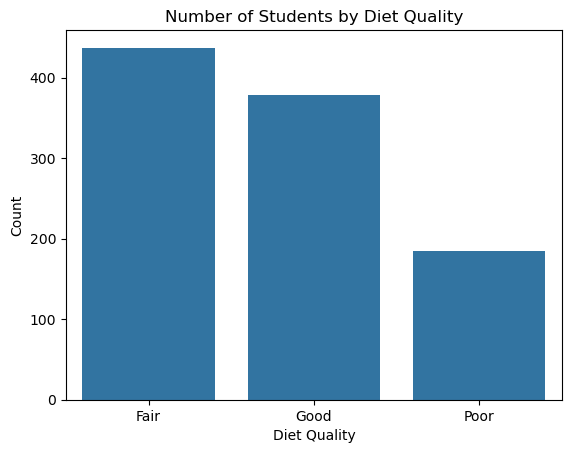

In [62]:

sns.countplot(x = df['diet_quality'])
plt.title('Number of Students by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Count')
plt.show()

## Here we see the Parents Education of all students

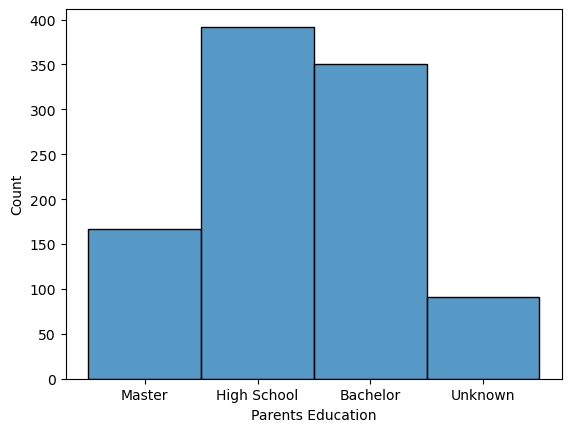

In [67]:
sns.histplot(df['parental_education_level'])
plt.xlabel('Parents Education');

## Here we know the who are doing part time job differenciate by Gender

In [82]:
stud_job_crosstab = pd.crosstab(df['gender'], df['part_time_job'])
print(stud_job_crosstab)

part_time_job   No  Yes
gender                 
Female         385   96
Male           368  109
Other           32   10


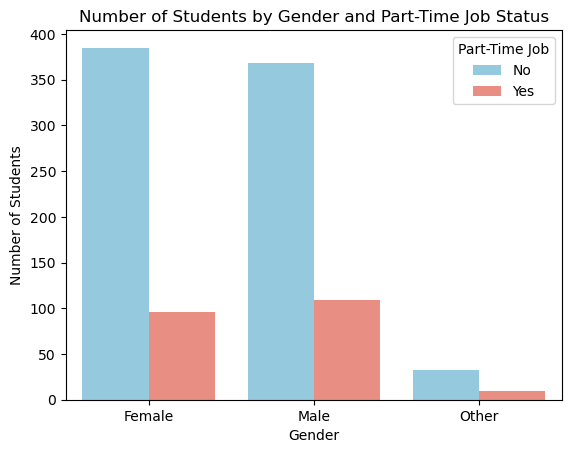

In [84]:
ax = sns.countplot(data=df, x='gender', hue='part_time_job', palette=['skyblue','salmon'])

plt.title('Number of Students by Gender and Part-Time Job Status')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Part-Time Job')
plt.show()

## Here we see the Age distribution 

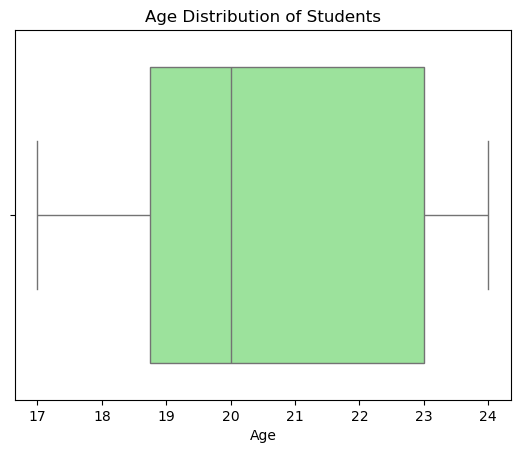

In [102]:
sns.boxplot(x=df['age'], color='lightgreen')
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.show()

The average age is 20 

## Here We Age Distribute based on gender

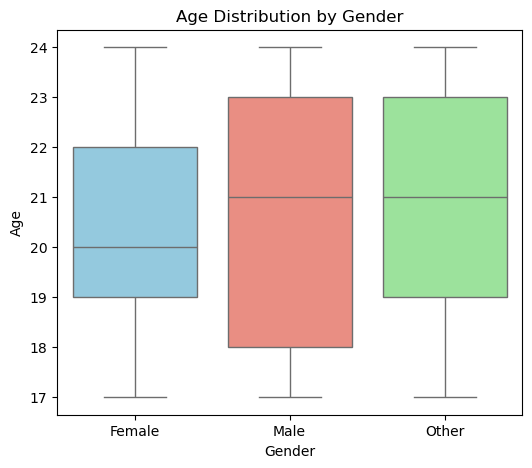

In [105]:
plt.figure(figsize=(6,5))
sns.boxplot(x='gender', y='age', data=df, palette=['skyblue','salmon','lightgreen'])
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

## Which habits have the strongest correlation with exam performance?

In [33]:
# First take all the necessary coloumn in one dataframe in that all the habbits 

numeric_df = df[['study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating','exam_score']]
numeric_df

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,0.0,1.2,1.1,85.0,8.0,6,8,56.2
1,6.9,2.8,2.3,97.3,4.6,6,8,100.0
2,1.4,3.1,1.3,94.8,8.0,1,1,34.3
3,1.0,3.9,1.0,71.0,9.2,4,1,26.8
4,5.0,4.4,0.5,90.9,4.9,3,1,66.4
...,...,...,...,...,...,...,...,...
995,2.6,0.5,1.6,77.0,7.5,2,6,76.1
996,2.9,1.0,2.4,86.0,6.8,1,6,65.9
997,3.0,2.6,1.3,61.9,6.5,5,9,64.4
998,5.4,4.1,1.1,100.0,7.6,0,1,69.7


In [27]:
#  Then see the Correlation between all the habbits and exam score
correlations = numeric_df.corr()['exam_score'].sort_values(ascending = False)

In [28]:
correlations

exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64

In [31]:
import warnings
warnings.filterwarnings('ignore')

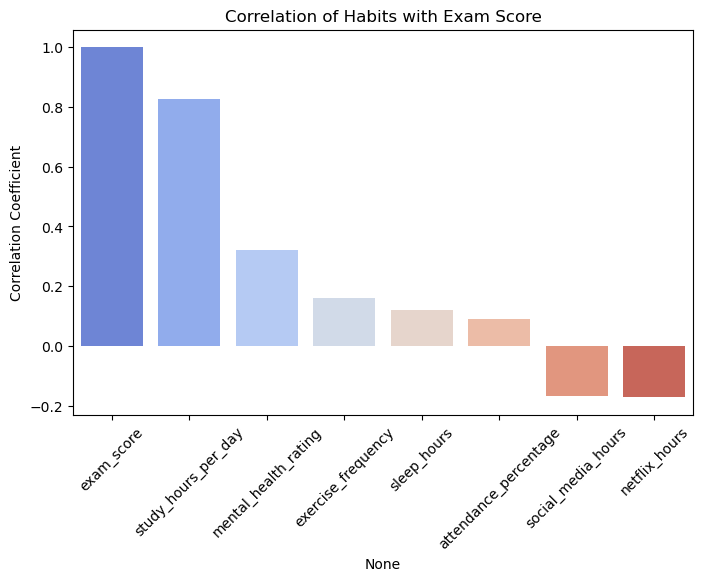

In [32]:
# Here we plot the graph of correlation

plt.figure(figsize=(8,5))
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")
plt.title("Correlation of Habits with Exam Score")
plt.xticks(rotation=45)
plt.ylabel("Correlation Coefficient")
plt.show()

- **Study Hours per Day (0.82)** has the strongest positive correlation — students who study more tend to score higher.  
- **Mental Health Rating (0.32)** also plays a meaningful role, showing that emotional well-being supports academic success.  
- **Exercise, Sleep, and Attendance** show smaller but positive relationships.  
- **Social Media (-0.16)** and **Netflix Hours (-0.17)** negatively affect exam performance — suggesting distractions lower scores.

## Do students with higher attendance have higher scores?

In [37]:
corr_stud = df['attendance_percentage'].corr(df['exam_score'])
corr_stud

np.float64(0.0898356017699273)

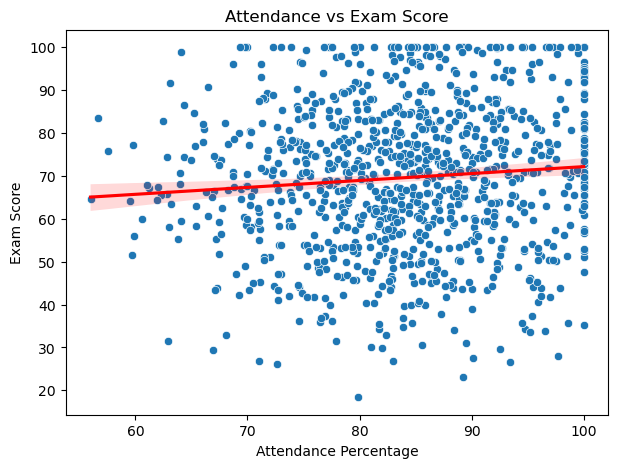

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score')
sns.regplot(data=df, x='attendance_percentage', y='exam_score', scatter=False, color='red') 
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.show()

- Observation: Students with higher attendance tend to score slightly higher, but the effect is weak.
- Conclusion: Attendance contributes positively but is not the strongest factor affecting exam scores.

## What is the distribution of study hours per day?

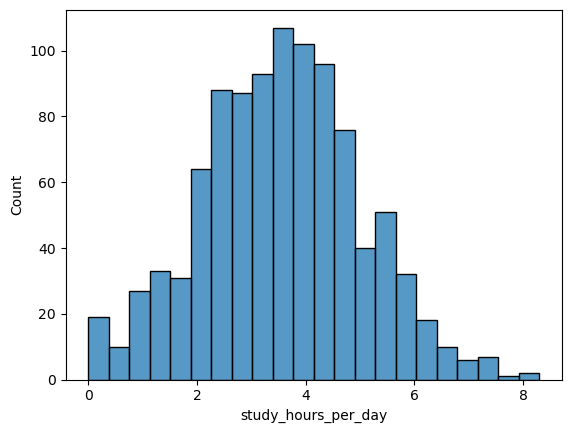

In [35]:
sns.histplot(x = 'study_hours_per_day' , data = df);

## Here we see most of the Students study 4 hrs in a per day

## What is the relationship between study hours and exam score?

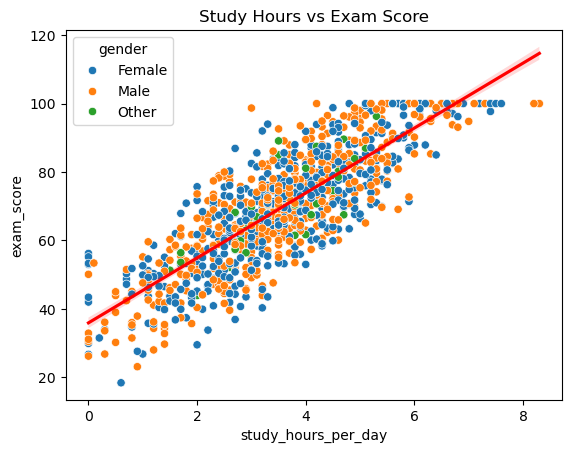

In [42]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender')
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter=False, color='red') 
plt.title('Study Hours vs Exam Score')
plt.show()

## Here Wee See the Correlation like study hours increases the exam scores also increases

## Correlation between mental health and exam score

In [43]:
# Import pearsonr to check the correlation between mental health and exam score

from scipy.stats import pearsonr

corr, p = pearsonr(df['mental_health_rating'], df['exam_score'])
print(f"Correlation: {corr}, P-value: {p}")

Correlation: 0.32152293065514603, P-value: 1.7526467011639981e-25


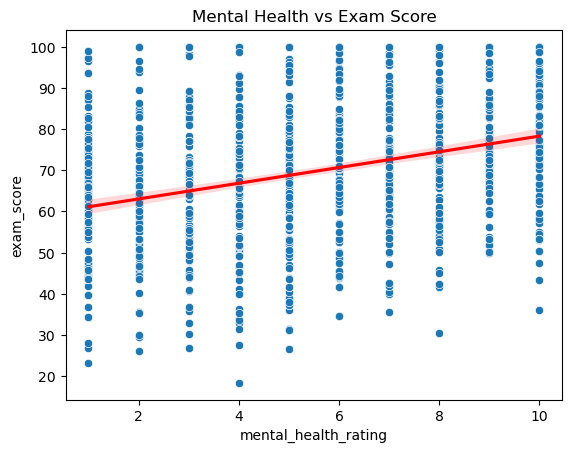

In [47]:
# Here we plot the graph 
sns.scatterplot(data=df, x='mental_health_rating', y='exam_score')
sns.regplot(data=df, x='mental_health_rating', y='exam_score', scatter=False, color='red') 
plt.title('Mental Health vs Exam Score')
plt.show()

### Mental Health vs Exam Score
- Correlation = 0.32 → moderate positive relationship
- P-value ≈ 1.75e-25 → statistically significant
- Observation: Students with higher mental health ratings tend to score higher in exams.
- Scatter plot shows individual student data; the red regression line shows the upward trend.
- Conclusion: Mental well-being positively affects academic performance, but other factors like study hours have stronger influence.

## Does having a part-time job significantly affect exam performance?

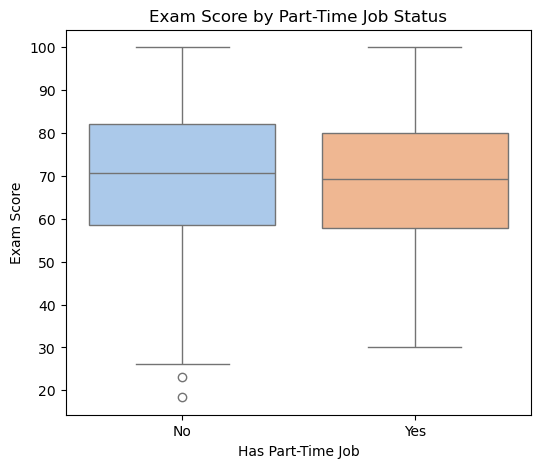

In [49]:
plt.figure(figsize=(6,5))
sns.boxplot(x='part_time_job', y='exam_score', data=df, palette='pastel')
plt.title('Exam Score by Part-Time Job Status')
plt.xlabel('Has Part-Time Job')
plt.ylabel('Exam Score')
plt.show()

## Having a part-time job may slightly reduce exam performance, possibly due to less available study time.